Github Repository: https://github.com/jmarikar/DSCI-Project.git

**Harnessing KNN Classification to Predict Newsletter Subscription Status among Minecraft Server Users**

**INTRODUCTION**

A research group in the department of UBC Computer Science has been running a Minecraft server to collect player data, and this project aims to create a model to aid in their recruitment efforts. The Minecraft server has collected several data points that are categorical, logical, and numerical. This data tracks how users interact with the Minecraft server, which is crucial to targeting efforts, similar to how user data is sold on the internet to companies for better ad targeting. The question that we aim to answer in this project is: can the total number of hours played and user age predict whether an individual will subscribe to the newsletter or not? To answer this question, we will use the "players.csv" data set, which contains 7 variables. There are four categorical variables: "experience," "hashedEmail," "name," and "gender." There is one logical variable that will act as the outcome variable, which our model will be modelled on: "Subscription." Additionally, 2 numerical variables will be crucial to the project: "age" and "played_hours" which will be our predictor variables.  

Below is a snippet of the dataset which has been loaded into R:

In [4]:
library(tidyverse)
library(repr)

players <- read_csv("https://raw.githubusercontent.com/jmarikar/DSCI-Project/main/players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


**Data Description**:

Above, we see the data loaded into R using read_csv. Here are what the variables mean for a quick overview of the players data set:

| Variable            | Description                                                                                                                                                        |
| ------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| hashedEmail         | These strings of characters are encrypted email addresses that undergo "hashing" to make them secure                                                            
| experience          | Classifies the user based on how much experience they have playing the game as "veteran," "regular," or "amateur"                                                  |
| subscribe           | Logical variable that states whether or not the user has subscribed to the game-related newsletter                                                                 |
| played_hours        | Total amount of hours that the user has logged on the server                                                                                                       |
| name                | User name                                                                                                                                                          |
| gender              | User gender                                                                                                                                                        |
| age                 | User age                                                                                                                                                           |



Below are Summary Statistics summarizing the amount of items each variable has, as well as other key metrics like minuimum, mean, and max for numeric values

In [5]:
players |> summary(across(round(hashed_Email: Age), 3))


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

Above, this summary shows us key metrics of the "players" data set. The variables have their own columns, observations have
their own rows, and each value has its own cell, meaning this data set is tidy. 



Methods and Results

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


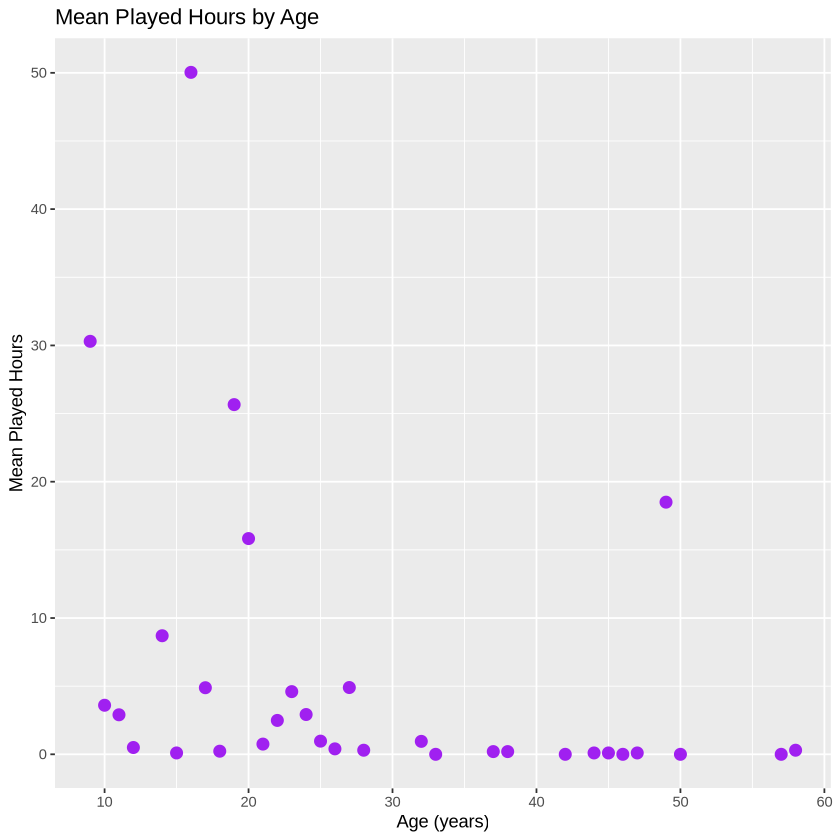

In [19]:

age_means  <- players |>
  group_by(Age) |>
  summarise(mean_played_hours = mean(played_hours, na.rm = TRUE))


ggplot(age_means, na.rm = TRUE, aes(x = Age, y = mean_played_hours)) +
  geom_point(color = "purple", size = 3) +
  labs(
    title = "Mean Played Hours by Age",
    x = "Age (years)",
    y = "Mean Played Hours")

The above graph shows there is no clear relationship between age and the mean amount of hours played on the server. 

Broad Question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

My Question: Can the number of total hours played predict whether an individual will subscribe to the newsletter or not, using the "players" data set?

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


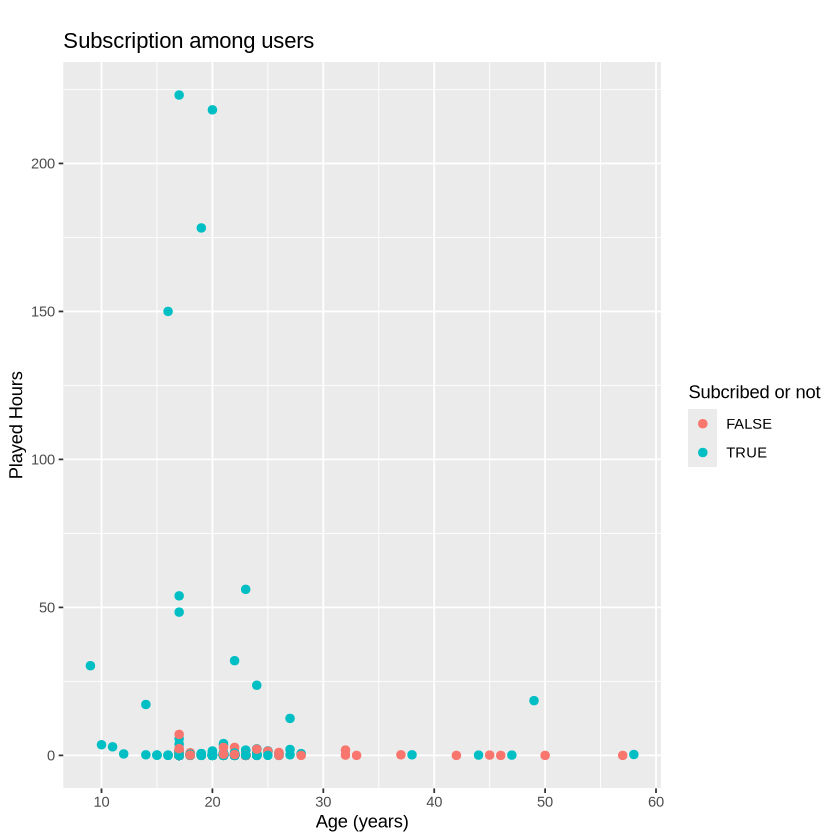

In [20]:
ggplot(players, na.rm = TRUE, aes(x = Age, y = played_hours, color = subscribe)) +
  geom_point( size = 2) +
  labs(
    title = "
Subscription among users",
    x = "Age (years)",
    y = "Played Hours", color = "Subcribed or not")

The data visualization above allows us to see that no one who played more than ~15 hours on the server subscribed to the newsletter, indicating a possible relationship between total hours played and whether a user was subscribed to the game-related newsletter. To create a model, we must see that the data is not continuous, as our response variable is a logical True or False, and not something that can be modelled linearly. Because of this, we would not want to use linear regression as the data does not present itself in a linear fashion, and does not have a continuous outcome. Similarly, we would not want to use KNN Regression because the outcome is not a continuous numerical value. 

For this kind of data, we would want to create a model using KNN Classification, which does not require continuous data, and can operate with classification outcomes like True or False in this case. With the right tuning and the use of cross-validation, we can use KNN classification to find the optimal amount of K neighbours, to be able to predict whether or not a player is likely to be subscribed to the newsletter based on how much of hours they have logged on the server. 

To accomplish this, we will only be using the "players" data set, then we will split the data into training and testing splits with a 65:35 training: testing ratio using prop and strata. We will then create a recipe using played_hours as our predictor with our training data, ensuring our data is scaled because KNN classification uses distance. We will then perform a five-fold cross-validation, followed by a workflow analysis using K values ranging from 1-20. We will then use the metrics function to find the best K for this model. This ideal K value will be used to fit our model so that we can predict unknown data points. 

A limitation to this model would be that the cross-validation of 20 Ks is extremely intensive and may need to be altered to be less straining on the server. Furthermore, KNN Classification does not fit an exact model like linear regression (which has distinct coefficients), so it may be hard to see what variable is truly the most predictive of an outcome. 